In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print("Heart Disease Dataset")
heart_df = pd.read_csv('./data/heart-statlog/data/heart-statlog_csv.csv')
print("COLUMNS", heart_df.columns)
print("SIZE",heart_df.size)
print(heart_df.describe)


Heart Disease Dataset
COLUMNS Index(['age', 'sex', 'chest', 'resting_blood_pressure', 'serum_cholestoral',
       'fasting_blood_sugar', 'resting_electrocardiographic_results',
       'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',
       'slope', 'number_of_major_vessels', 'thal', 'class'],
      dtype='object')
SIZE 3780
<bound method NDFrame.describe of      age  sex  chest  resting_blood_pressure  serum_cholestoral  \
0     70    1      4                     130                322   
1     67    0      3                     115                564   
2     57    1      2                     124                261   
3     64    1      4                     128                263   
4     74    0      2                     120                269   
..   ...  ...    ...                     ...                ...   
265   52    1      3                     172                199   
266   44    1      2                     120                263   
267   56    0    

In [172]:
heart_df.dtypes

age                                       int64
sex                                       int64
chest                                     int64
resting_blood_pressure                    int64
serum_cholestoral                         int64
fasting_blood_sugar                       int64
resting_electrocardiographic_results      int64
maximum_heart_rate_achieved               int64
exercise_induced_angina                   int64
oldpeak                                 float64
slope                                     int64
number_of_major_vessels                   int64
thal                                      int64
class                                    object
dtype: object

In [173]:
# There is no missing data in heart dataset, where 0 means no missing data
heart_df.isna().sum()

age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
class                                   0
dtype: int64

In [174]:
print("Min age: {}".format(heart_df['age'].min()))
print("Max age: {}".format(heart_df['age'].max()))

Min age: 29
Max age: 77


# Data visualization

# Heart Disease Dataset

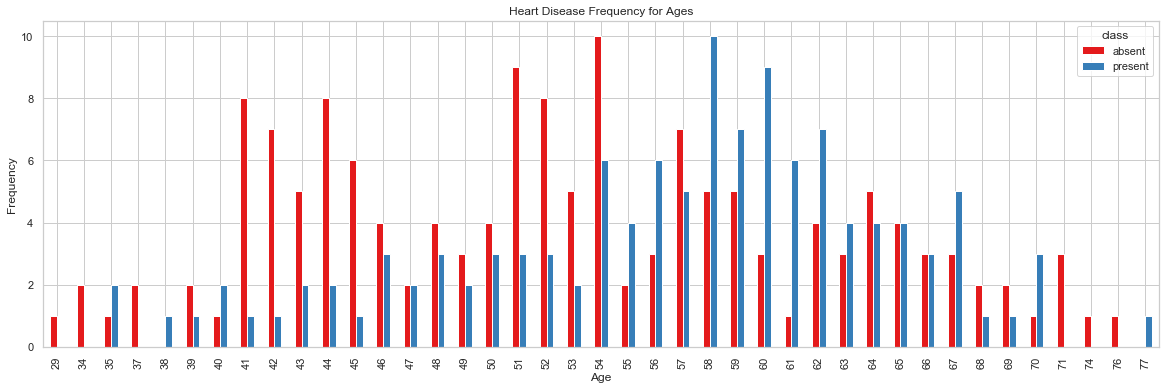

In [175]:
sns.set(style="whitegrid")
sns.set_palette(sns.color_palette("Set1", n_colors=5))


pd.crosstab(heart_df['age'],heart_df['class']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

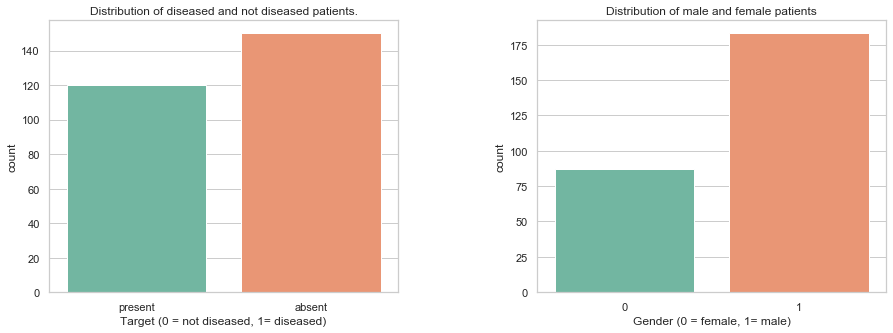

In [176]:
sns.set(style="whitegrid")
sns.set_palette(sns.color_palette("Set2", n_colors=5))

plt.figure(figsize=(15,12))
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Distribution of diseased and not diseased patients.")
sns.countplot(x="class", data=heart_df)
plt.xlabel("Target (0 = not diseased, 1= diseased)")

plt.subplot(2,2,2)
plt.title("Distribution of male and female patients")
sns.countplot(x="sex", data=heart_df)
plt.xlabel("Gender (0 = female, 1= male)")
plt.show()

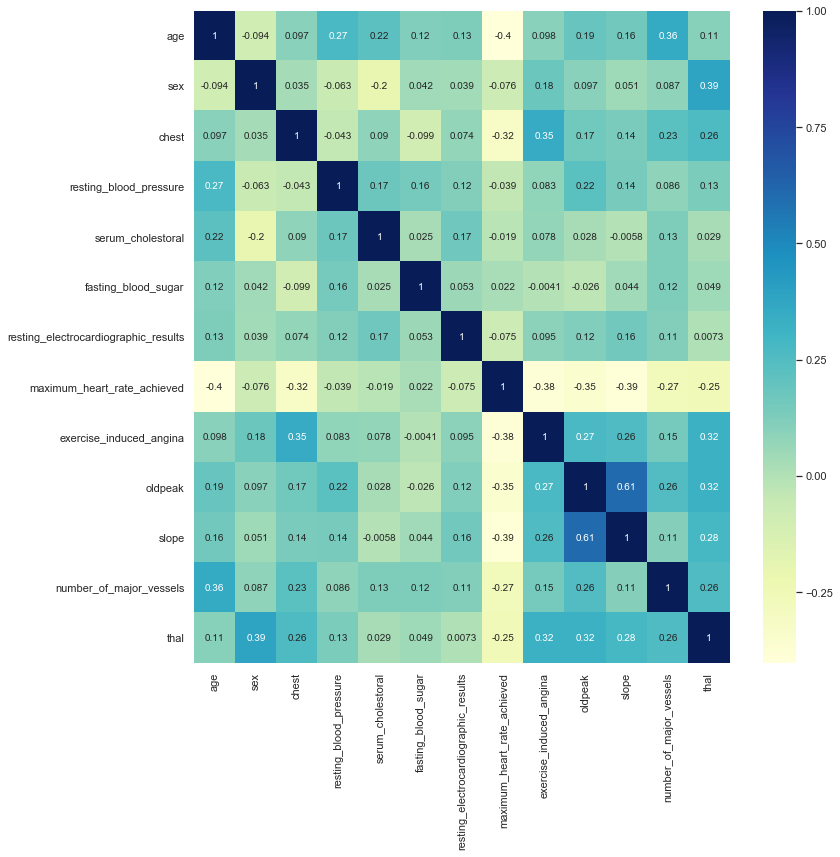

In [177]:
# find correlation - highly correlated features can be removed. With a threshold of 80%, no highly correlated features
plt.figure(figsize=(12,12))
sns.heatmap(heart_df.corr(),annot=True,cmap='YlGnBu', annot_kws={"size": 10})
plt.yticks(rotation = 0)
# plt.tight_layout()
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 
plt.show()

# Cervical Cancer Dataset

In [178]:
print("Cervical Cancer Dataset")
cervical_df = pd.read_csv('./data/cervical-cancer/data/cervical-cancer_csv.csv')
print("COLUMNS", cervical_df.columns)
print("SIZE",cervical_df.size)
print(cervical_df.describe)

Cervical Cancer Dataset
COLUMNS Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')
SIZE 30060
<bound method NDFrame.describe of      Age  Number of sexual partners  First sexual intercourse  \
0     18                       

In [179]:
# There's a lot of missing data in cervical dataset, where 0 means no missing data
cervical_df.isna().sum()

Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
STDs:Hepatitis B                  

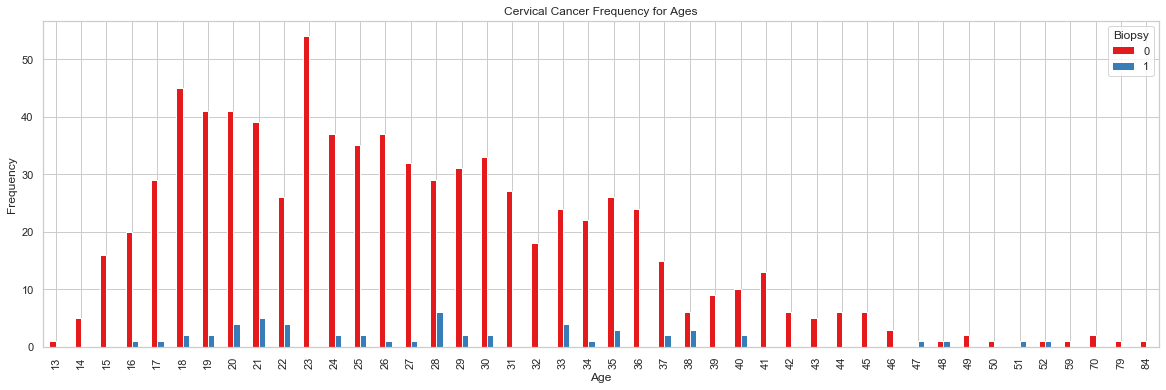

In [180]:
sns.set(style="whitegrid")
sns.set_palette(sns.color_palette("Set1", n_colors=5))


pd.crosstab(cervical_df['Age'],cervical_df['Biopsy']).plot(kind="bar",figsize=(20,6))
plt.title('Cervical Cancer Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'Target (0 = no cervical cancer, 1= cervical cancer)')

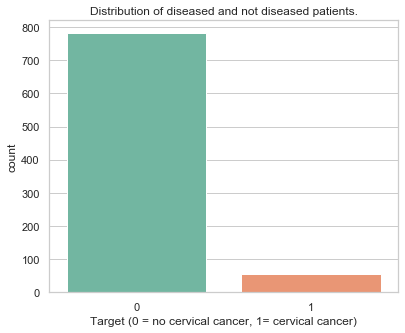

In [181]:
sns.set(style="whitegrid")
sns.set_palette(sns.color_palette("Set2", n_colors=5))

plt.figure(figsize=(15,12))
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Distribution of diseased and not diseased patients.")
sns.countplot(x="Biopsy", data=cervical_df)
plt.xlabel("Target (0 = no cervical cancer, 1= cervical cancer)")

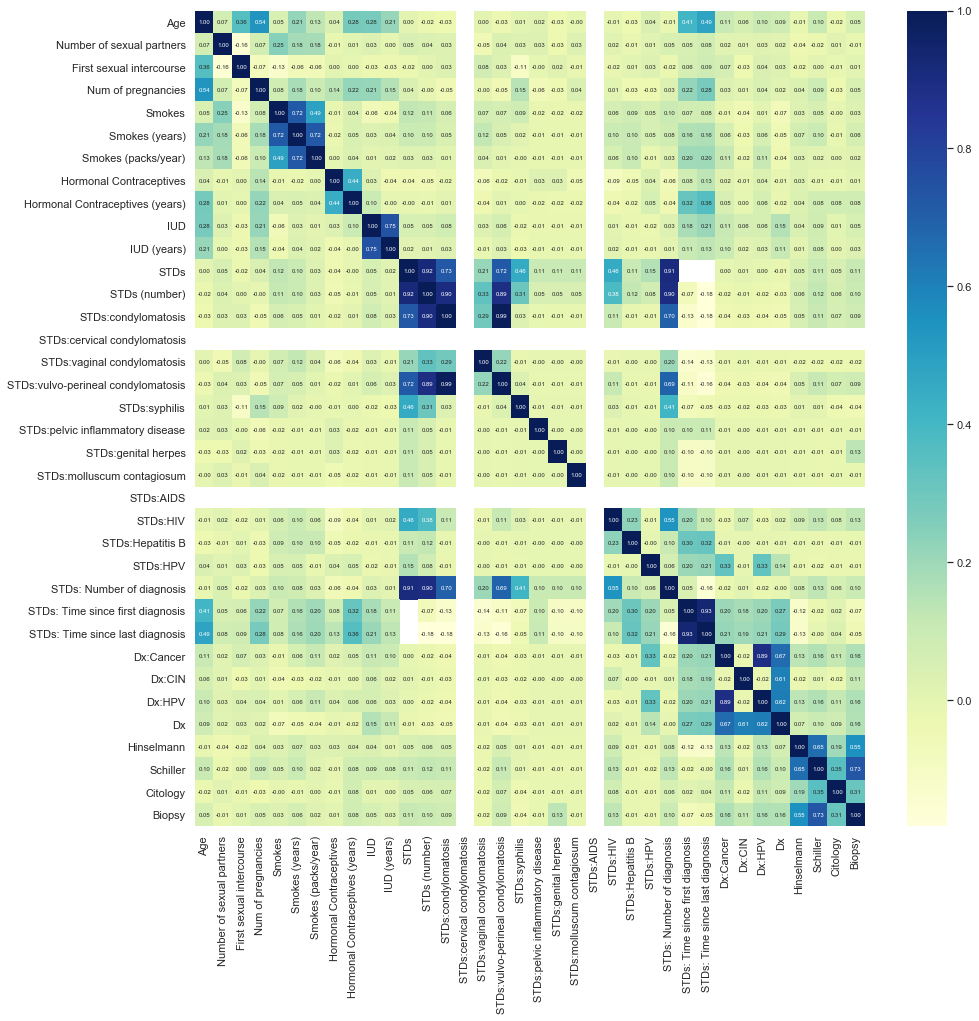

In [182]:
# find correlation - highly correlated features can be removed. With a threshold of 80%, no highly correlated features
plt.figure(figsize=(15,15))
sns.heatmap(cervical_df.corr(),annot=True,cmap='YlGnBu', annot_kws={"size": 6}, fmt='.2f')
plt.yticks(rotation = 0)
# plt.tight_layout()
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 
plt.show()